# Consensus Clustering

## Importing Packages

In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Label Data and Getting Their Totals

In [2]:
curPlace = os.getcwd() + '\output files\Class Labels.xlsx'

data = pd.read_excel(curPlace)
data = data.to_numpy()
PCALabels = data[:,2]
UMAPLabels = data[:,3]
TSNELabels = data[:,4]

totalLabels = PCALabels + UMAPLabels + TSNELabels

# seems to prioritize:
# high color score
# low complexity score
# low vis count
# low white space

# assuming 3 is good and 0 is bad

## Opening the PCA Data

In [3]:
curPlace = os.getcwd() + '\output files\PCA Analysis.xlsx'
data = pd.read_excel(curPlace)
data = data.to_numpy()
Names = data[:,1]
Names = pd.DataFrame(Names)
x = data[:,2]
y = data[:,3]

## Creating the Output Files and Figure Outputs Directory if it Does Not Already Exist

In [4]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\output files'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

In [5]:
current_directory = os.getcwd()

# Combine current directory path with the desired directory name
new_directory_path = current_directory + '\\figure outputs'

# Check if the directory exists
if not os.path.exists(new_directory_path):
    # Create the directory if it doesn't exist
    os.makedirs(new_directory_path)

## Outputting the Total Labels

In [6]:
totalLabelsOut = pd.DataFrame(totalLabels)
totalLabelsOut = np.hstack((Names,totalLabelsOut))
totalLabelsOut = pd.DataFrame(data = totalLabelsOut, columns = ['Figure Number', 'TotalLables'])
totalLabelsOut.to_excel(os.getcwd() + '\\output files\\Total Labels.xlsx')

## Making a figure of the Total Labels using PCA

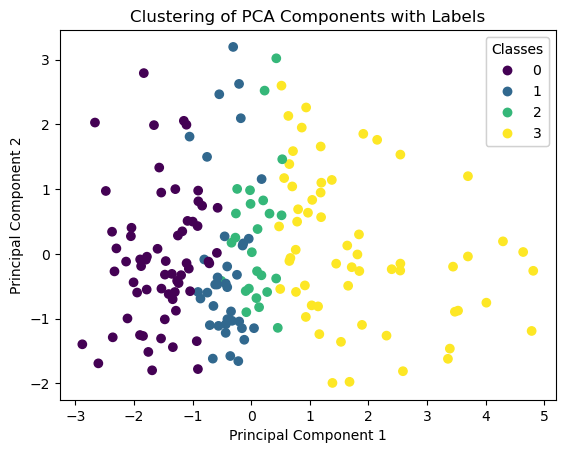

In [7]:
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=totalLabels)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of PCA Components with Labels')
plt.savefig(os.getcwd() + '\\figure outputs\\PCA Analysis with Labels.png')

## Removing the Mid-Labels

In [8]:
totalLabels2 = np.array([1])
xkeep = np.array([1])
ykeep = np.array([1])

removedCount = 0
i = 0
while i < np.size(totalLabels):
    if totalLabels[i] == 0:
        xkeep = np.hstack((xkeep, x[i]))
        ykeep = np.hstack((ykeep, y[i]))
        totalLabels2 = np.hstack((totalLabels2,totalLabels[i]))
        
    elif totalLabels[i] ==3:
        xkeep = np.hstack((xkeep, x[i]))
        ykeep = np.hstack((ykeep, y[i]))
        totalLabels2 = np.hstack((totalLabels2,totalLabels[i]))
        
    elif totalLabels[i] ==1 or totalLabels[i] == 2:
        removedCount = removedCount +1
    i = i + 1
    
s = np.size(ykeep)
totalLabels2 = totalLabels2[1:s]
ykeep = ykeep[1:s]
xkeep = xkeep[1:s]
print(removedCount)

62


## Plotting the PCA using Extreme Labels Only

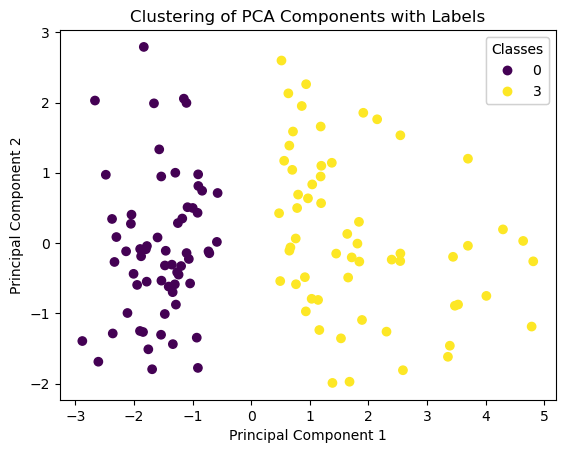

In [9]:
fig, ax = plt.subplots()

scatter = ax.scatter(xkeep, ykeep, c=totalLabels2)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of PCA Components with Labels')
plt.savefig(os.getcwd() + '\\figure outputs\\PCA Analysis Clustered.png')

## Opening the UMAP Data

In [10]:
curPlace = os.getcwd() + '\\output files\\UMAP Analysis.xlsx'
data = pd.read_excel(curPlace)
data = data.to_numpy()
Names = data[:,1]
x = data[:,2]
y = data[:,3]

## Plotting UMAP with Intermediate Labels

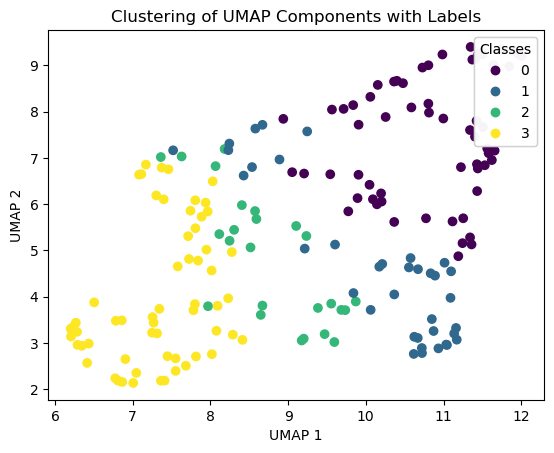

In [11]:
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=totalLabels)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Clustering of UMAP Components with Labels')
plt.savefig(os.getcwd() + '\\figure outputs\\UMAP Analysis with Labels.png')

## Removing the Mid-Labels

In [12]:
totalLabels2 = np.array([1])
xkeep = np.array([1])
ykeep = np.array([1])

removedCount = 0
i = 0
while i < np.size(totalLabels):
    if totalLabels[i] == 0:
        xkeep = np.hstack((xkeep, x[i]))
        ykeep = np.hstack((ykeep, y[i]))
        totalLabels2 = np.hstack((totalLabels2,totalLabels[i]))
        
    elif totalLabels[i] ==3:
        xkeep = np.hstack((xkeep, x[i]))
        ykeep = np.hstack((ykeep, y[i]))
        totalLabels2 = np.hstack((totalLabels2,totalLabels[i]))
        
    elif totalLabels[i] ==1 or totalLabels[i] == 2:
        removedCount = removedCount +1
    i = i + 1
    
s = np.size(ykeep)
totalLabels2 = totalLabels2[1:s]
ykeep = ykeep[1:s]
xkeep = xkeep[1:s]
print(removedCount)

62


## Plotting UMAP with Extreme Labels

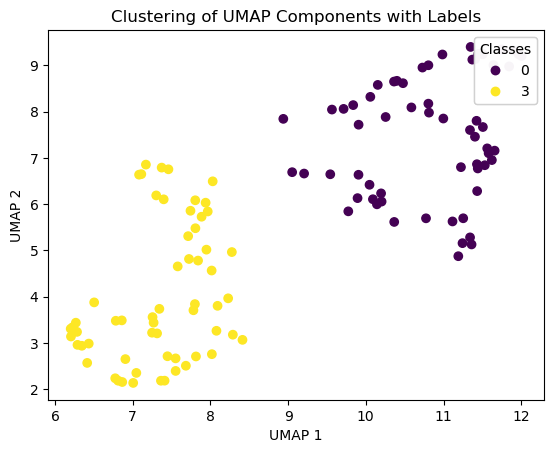

In [13]:
fig, ax = plt.subplots()

scatter = ax.scatter(xkeep, ykeep, c=totalLabels2)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Clustering of UMAP Components with Labels')
plt.savefig(os.getcwd() + '\\figure outputs\\UMAP Analysis Clustered.png')

## Opening the TSNE Data

In [14]:
curPlace = os.getcwd() + '\\output files\\TSNE Analysis.xlsx'
data = pd.read_excel(curPlace)
data = data.to_numpy()
Names = data[:,1]
x = data[:,2]
y = data[:,3]

## Plotting the TSNE Data using Intermediate Labels

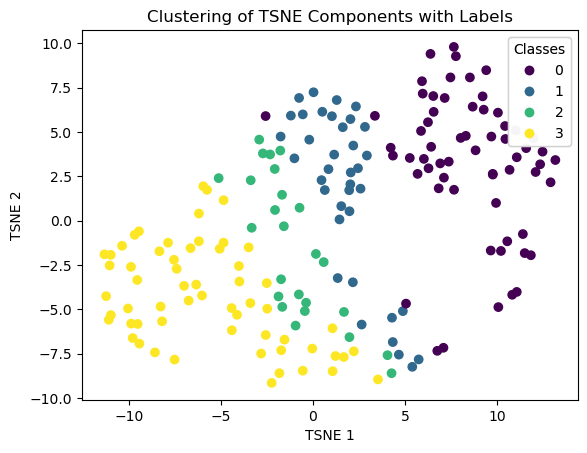

In [15]:
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=totalLabels)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Clustering of TSNE Components with Labels')
plt.savefig(os.getcwd() + '\\figure outputs\\TSNE Analysis with Labels.png')

## Removing the Mid-Labels

In [16]:
totalLabels2 = np.array([1])
xkeep = np.array([1])
ykeep = np.array([1])
NameArr = np.array(['1'])

removedCount = 0
i = 0
while i < np.size(totalLabels):
    if totalLabels[i] == 0:
        xkeep = np.vstack((xkeep, x[i]))
        ykeep = np.vstack((ykeep, y[i]))
        totalLabels2 = np.vstack((totalLabels2,totalLabels[i]))
        NameArr = np.vstack((NameArr, Names[i]))
        
    elif totalLabels[i] ==3:
        xkeep = np.vstack((xkeep, x[i]))
        ykeep = np.vstack((ykeep, y[i]))
        totalLabels2 = np.vstack((totalLabels2,totalLabels[i]))
        NameArr = np.vstack((NameArr, Names[i]))
        
    elif totalLabels[i] ==1 or totalLabels[i] == 2:
        removedCount = removedCount +1
    i = i + 1
    
s = np.size(ykeep)
totalLabels2 = totalLabels2[1:s]
ykeep = ykeep[1:s]
xkeep = xkeep[1:s]
NameArr = NameArr[1:s]
print(removedCount)


62


## Plotting TSNE with Extreme Labels

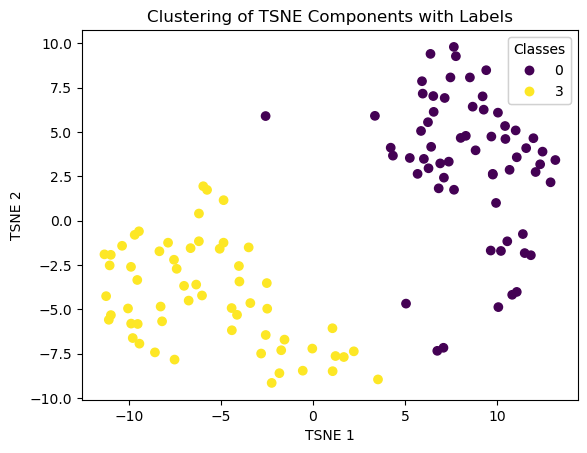

In [17]:
fig, ax = plt.subplots()

scatter = ax.scatter(xkeep, ykeep, c=totalLabels2)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Clustering of TSNE Components with Labels')
plt.savefig(os.getcwd() + '\\figure outputs\\TSNE Analysis Clustered.png')

## Combining the Names to the Extreme Labels

In [18]:
totalLabels2 = pd.DataFrame(totalLabels2)
totalLabels2 = np.hstack((NameArr, totalLabels2))

## Outputting the Extreme Labels

In [19]:
totalLabels2 = pd.DataFrame(data = totalLabels2, columns = ['Figure Name', 'Binary Labels'])
totalLabels2.to_excel(os.getcwd() + '\\output files\\Binary Labels.xlsx')